In [41]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt

## Calculations for total voting population

In [2]:
file_import = os.path.join("Resources","Total_vote.csv")

In [3]:
with open(file_import, 'r', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    csv_header = next(csv_reader)
    Total_vote = pd.DataFrame(csv_reader, columns = csv_header)

In [4]:
Total_vote

,,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
0,Total voting age,245502,235248,225499,215694,202609,193651,185684,178098,169963,157085,146548
1,Total voted,137537,132948,131144,125736,110826,105017,113866,102224,101878,93066,86698
2,Percent voted,56,56.5,58.2,58.3,54.7,54.2,61.3,57.4,59.9,59.2,59.2


In [5]:
id_vars=['2016','2012', '2008', '2004', '2000', '1996', '1992', '1988', '1984', '1980', '1976']

In [6]:
cols = ['Total voting age', 'Total voted', 'Percent voted']

In [7]:
Total_vote = Total_vote.transpose(copy = True)

In [8]:
Total_vote.columns = Total_vote.iloc[0]
Total_vote = Total_vote.drop(Total_vote.index[0])

In [9]:
Total_vote

,Total voting age,Total voted,Percent voted
2016,245502,137537,56
2012,235248,132948,56.5
2008,225499,131144,58.2
2004,215694,125736,58.3
2000,202609,110826,54.7
1996,193651,105017,54.2
1992,185684,113866,61.3
1988,178098,102224,57.4
1984,169963,101878,59.9
1980,157085,93066,59.2


In [10]:
Total_vote.dtypes


Total voting age    object
Total voted         object
Percent voted       object
dtype: object

In [11]:
Total_vote = Total_vote.apply(pd.to_numeric)
Total_vote.dtypes


Total voting age      int64
Total voted           int64
Percent voted       float64
dtype: object

In [12]:
def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

In [13]:
iterations = [0,1,2]

In [14]:
for i in iterations:
    start_value = float(Total_vote.iloc[0, i])
    end_value = float(Total_vote.iloc[-1, i])
    num_periods = len(Total_vote)
    print(f'Predicted growth in 2020 for {Total_vote.columns[i]} is of {cagr(start_value, end_value, num_periods)}')

Predicted growth in 2020 for Total voting age is of -0.05028677406890514
Predicted growth in 2020 for Total voted is of -0.04509766966757811
Predicted growth in 2020 for Percent voted is of 0.005572453797072052


## Calculations for age participation

In [15]:
file_import = os.path.join("Resources","Age_participation.csv")
with open(file_import, 'r', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    csv_header = next(csv_reader)
    Age_part = pd.DataFrame(csv_reader, columns = csv_header)

In [16]:
Age_part

,,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
0,18 to 24 years,39.4,38,44.3,41.9,32.3,32.4,42.8,36.2,40.8,39.9,42.2
1,25 to 44 years,48.97788504,49.5,51.9,52.2,49.8,49.2,58.3,54,58.4,58.7,58.7
2,45 to 64 years,61.7,63.4,65,66.6,64.1,64.4,70,67.9,69.8,69.3,68.7
3,65 years and over,68.42905267,69.7,68.1,68.9,67.6,67,70.1,68.8,67.7,65.1,62.2


In [17]:
Age_part = Age_part.set_index(Age_part.columns[0])

In [18]:
Age_part

,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
,,,,,,,,,,,
18 to 24 years,39.4,38,44.3,41.9,32.3,32.4,42.8,36.2,40.8,39.9,42.2
25 to 44 years,48.97788504,49.5,51.9,52.2,49.8,49.2,58.3,54,58.4,58.7,58.7
45 to 64 years,61.7,63.4,65,66.6,64.1,64.4,70,67.9,69.8,69.3,68.7
65 years and over,68.42905267,69.7,68.1,68.9,67.6,67,70.1,68.8,67.7,65.1,62.2


In [19]:
Age_part = Age_part.apply(pd.to_numeric)
Age_part.dtypes

2016    float64
2012    float64
2008    float64
2004    float64
2000    float64
1996    float64
1992    float64
1988    float64
1984    float64
1980    float64
1976    float64
dtype: object

In [20]:
Age_part = Age_part.transpose(copy = True)


In [21]:
Age_part

,18 to 24 years,25 to 44 years,45 to 64 years,65 years and over
2016,39.4,48.977885,61.7,68.429053
2012,38.0,49.500000,63.4,69.700000
2008,44.3,51.900000,65.0,68.100000
2004,41.9,52.200000,66.6,68.900000
2000,32.3,49.800000,64.1,67.600000
1996,32.4,49.200000,64.4,67.000000
1992,42.8,58.300000,70.0,70.100000
1988,36.2,54.000000,67.9,68.800000
1984,40.8,58.400000,69.8,67.700000
1980,39.9,58.700000,69.3,65.100000


In [22]:
iterations = [0,1,2,3]

In [23]:
for i in iterations:
    start_value = float(Age_part.iloc[0, i])
    end_value = float(Age_part.iloc[-1, i])
    num_periods = len(Age_part)
    print(f'Predicted growth in 2020 for {Age_part.columns[i]} is of {cagr(start_value, end_value, num_periods)}')

Predicted growth in 2020 for 18 to 24 years is of 0.006889061635877214
Predicted growth in 2020 for 25 to 44 years is of 0.018272012853188357
Predicted growth in 2020 for 45 to 64 years is of 0.010804478156951625
Predicted growth in 2020 for 65 years and over is of -0.009498846354683899


## Calculations for gender participation

In [24]:
file_import = os.path.join("Resources","Gender_participation.csv")
with open(file_import, 'r', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    csv_header = next(csv_reader)
    Gender_part = pd.DataFrame(csv_reader, columns = csv_header)

In [25]:
Gender_part

,,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
0,Male,53.8,54.4,55.7,56.3,53.1,52.8,60.2,56.4,59,59.1,59.6
1,Female,58.1,58.5,60.4,60.1,56.2,55.5,62.3,58.3,60.8,59.4,58.8


In [67]:
Gender_part.shape
Year2016=Gender_part.loc['2016']
#Year2016
Year2012=Gender_part.loc['2012']
Year2008=Gender_part.loc['2008']
Year2004=Gender_part.loc['2004']
Year2000=Gender_part.loc['2000']

In [68]:
Gender_part = Gender_part.set_index(Gender_part.columns[0])

In [69]:
Gender_part

,Female
Male,
53.8,58.1
54.4,58.5
55.7,60.4
56.3,60.1
53.1,56.2
52.8,55.5
60.2,62.3
56.4,58.3
59,60.8


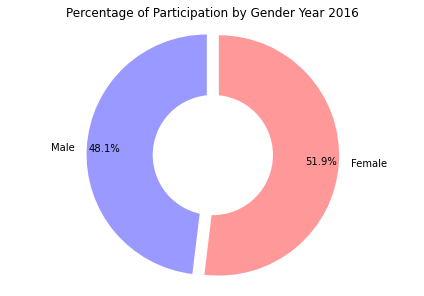

In [73]:
labels=["Male","Female"]
sizes=Year2016
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.tight_layout()
plt.title("Percentage of Participation by Gender Year 2016")
plt.savefig("./Images/Gender2016.png")
plt.show()

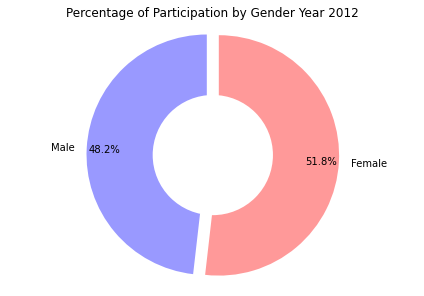

In [71]:
labels=["Male","Female"]
sizes=Year2012
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.tight_layout()
plt.title("Percentage of Participation by Gender Year 2012")
plt.savefig("./Images/Gender2012.png")
plt.show()

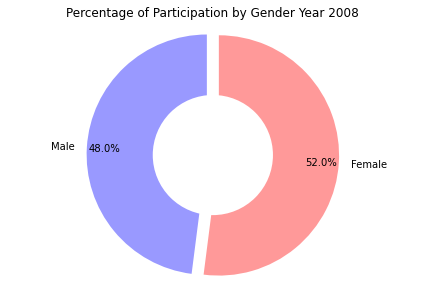

In [74]:
labels=["Male","Female"]
sizes=Year2008
colors = ['#9999ff','#ff9999']                         
explode = (0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
plt.axis("equal")  
plt.tight_layout()
plt.title("Percentage of Participation by Gender Year 2008")
plt.savefig("./Images/Gender2008.png")
plt.show()

In [28]:
Gender_part = Gender_part.transpose(copy = True)

In [29]:
Gender_part

,Male,Female
2016,53.8,58.1
2012,54.4,58.5
2008,55.7,60.4
2004,56.3,60.1
2000,53.1,56.2
1996,52.8,55.5
1992,60.2,62.3
1988,56.4,58.3
1984,59,60.8
1980,59.1,59.4


In [30]:
import numpy as np

In [31]:
iterations = (np.arange(0, len(Gender_part.columns)))

In [32]:
for i in iterations:
    start_value = float(Gender_part.iloc[0, i])
    end_value = float(Gender_part.iloc[-1, i])
    num_periods = len(Gender_part)
    print(f'Predicted growth in 2020 for {Gender_part.columns[i]} is of {cagr(start_value, end_value, num_periods)}')

Predicted growth in 2020 for Male is of 0.010290800491351115
Predicted growth in 2020 for Female is of 0.0011983365368064547


## Calculations for race participation

In [33]:
file_import = os.path.join("Resources","Race_participation.csv")
with open(file_import, 'r', encoding='utf-8-sig') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    csv_header = next(csv_reader)
    Race_part = pd.DataFrame(csv_reader, columns = csv_header)

In [34]:
Race_part

,,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980,1976
0,White,58.2,57.6,59.6,60.3,56.4,56,63.6,59.1,61.4,60.9,60.9
1,White non-Hispanic,64.1,63,64.8,65.8,60.4,59.6,66.9,61.8,63.3,62.8,0
2,Black,55.9,62,60.8,56.3,53.5,50.6,54,51.5,55.8,50.5,48.7
3,Asian and Pacific Islander,33.9,31.3,32.1,29.8,25.4,25.7,27.3,0,0,0,0
4,Hispanic (of any race),32.5,31.8,31.6,28,27.5,26.7,28.9,28.8,32.6,29.9,31.8


In [35]:
Race_part = Race_part.set_index(Race_part.columns[0])

In [36]:
ElectionPastRace=Race_part['2016']
ElectionPastRace


White                         58.2
White non-Hispanic            64.1
Black                         55.9
Asian and Pacific Islander    33.9
Hispanic (of any race)        32.5
Name: 2016, dtype: object

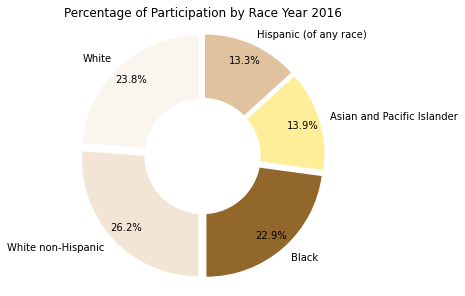

In [44]:
#***check percentage quantitys
labels=["White","White non-Hispanic","Black","Asian and Pacific Islander","Hispanic (of any race)"]
sizes=ElectionPastRace
colors = ['#faf5ef','#f2e5d6','#91672C','#ffee99','#e0c29e']                         
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)                         
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")  
plt.tight_layout()
plt.title("Percentage of Participation by Race Year 2016")
#plt.savefig("./Images/Race2016.png")
plt.show()

In [37]:
Race_part = Race_part.apply(pd.to_numeric)
Race_part.dtypes

2016    float64
2012    float64
2008    float64
2004    float64
2000    float64
1996    float64
1992    float64
1988    float64
1984    float64
1980    float64
1976    float64
dtype: object

In [38]:
Race_part = Race_part.transpose(copy = True)
Race_part

,White,White non-Hispanic,Black,Asian and Pacific Islander,Hispanic (of any race)
2016,58.2,64.1,55.9,33.9,32.5
2012,57.6,63.0,62.0,31.3,31.8
2008,59.6,64.8,60.8,32.1,31.6
2004,60.3,65.8,56.3,29.8,28.0
2000,56.4,60.4,53.5,25.4,27.5
1996,56.0,59.6,50.6,25.7,26.7
1992,63.6,66.9,54.0,27.3,28.9
1988,59.1,61.8,51.5,0.0,28.8
1984,61.4,63.3,55.8,0.0,32.6
1980,60.9,62.8,50.5,0.0,29.9


In [39]:
iterations = (np.arange(0, len(Race_part.columns)))
for i in iterations:
    start_value = float(Race_part.iloc[0, i])
    end_value = float(Race_part.iloc[6, i])
    num_periods = len(Race_part)
    print(f'Predicted growth in 2020 for {Race_part.columns[i]} is of {cagr(start_value, end_value, num_periods)}')

Predicted growth in 2020 for White  is of 0.008912291633392133
Predicted growth in 2020 for White non-Hispanic is of 0.004284613140757232
Predicted growth in 2020 for Black is of -0.0034520612482230595
Predicted growth in 2020 for Asian and Pacific Islander is of -0.02142009152080593
Predicted growth in 2020 for Hispanic (of any race) is of -0.011671206272178658


### CAGR method extracted from :
https://towardsdatascience.com/python-vs-excel-compound-annual-growth-rate-cagr-c8dbad46d3e0

Made with Data from: 
US Census